# Verlet integrator simulating SHO system

In [ ]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
from Code.dynamical_system import *
from Code.time_integrator import *


np.random.seed(2512517)

## Verlet Integrator

Set system parameters, construct Verlet numerical integrator.

The model system we are using here is the harmonic oscillator.

The timestep size of the Neural network integrator takes values in $\Delta t_{\text{Verlet}},20\Delta t_{\text{Verlet}},40\Delta t_{\text{Verlet}},100\Delta t_{\text{Verlet}}$ where $\Delta t_{\text{Verlet}}$ is the step size of the Verlet integrator that is used for training.

In [ ]:
# mass of particle
mass = 1.2
# spring constant of harmonic oscillator
k_spring = 0.9
# timestep for Verlet integrator
dt_verlet = 0.005
# timestep for neural network integrator

dt_2 = 20*dt_verlet
dt_3 = 40*dt_verlet
dt_4 = 100*dt_verlet


harmonic_oscillator = HarmonicOscillator(mass,k_spring)

verlet_SHO_1 = VerletIntegrator(harmonic_oscillator,dt_verlet)
verlet_SHO_2 = VerletIntegrator(harmonic_oscillator,dt_2)
verlet_SHO_3 = VerletIntegrator(harmonic_oscillator,dt_3)
verlet_SHO_4 = VerletIntegrator(harmonic_oscillator,dt_4)

## Plot trajectories generated to $t=32$ by Verlet integrator

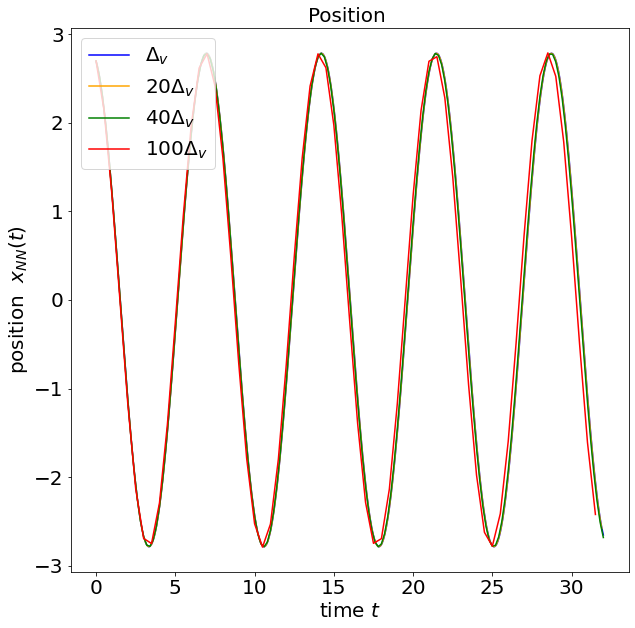

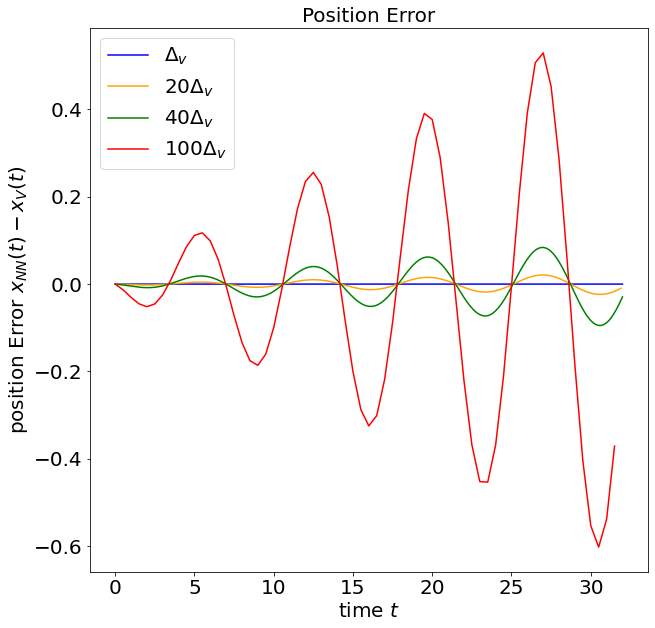

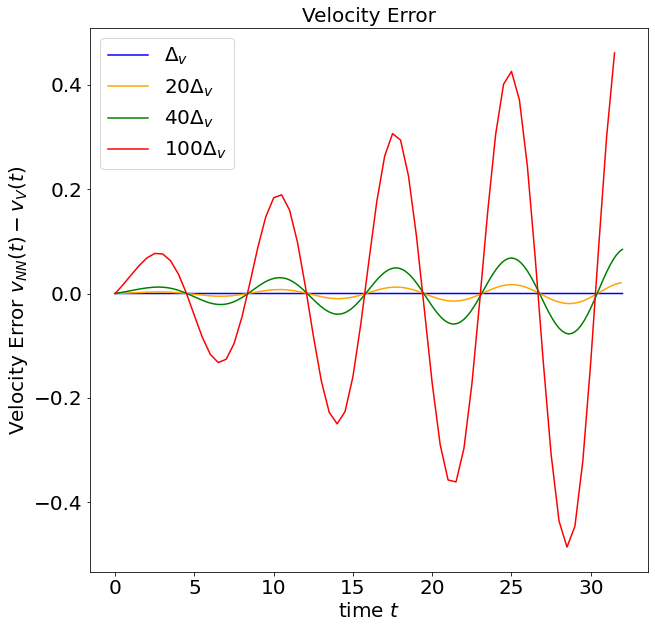

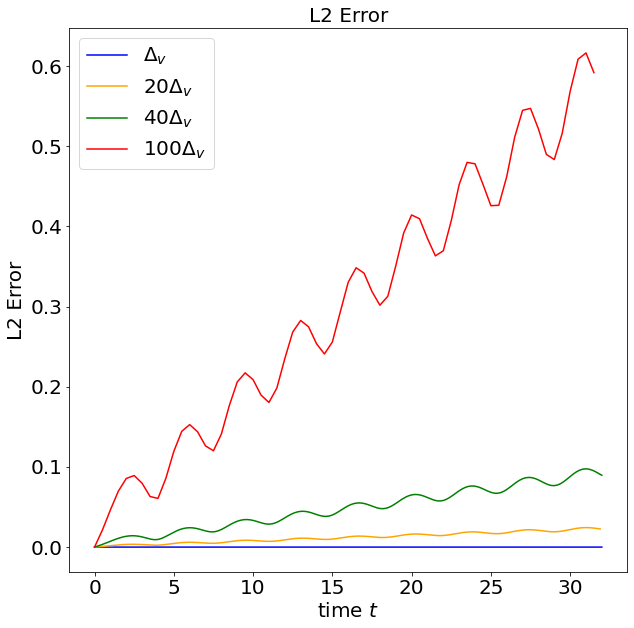

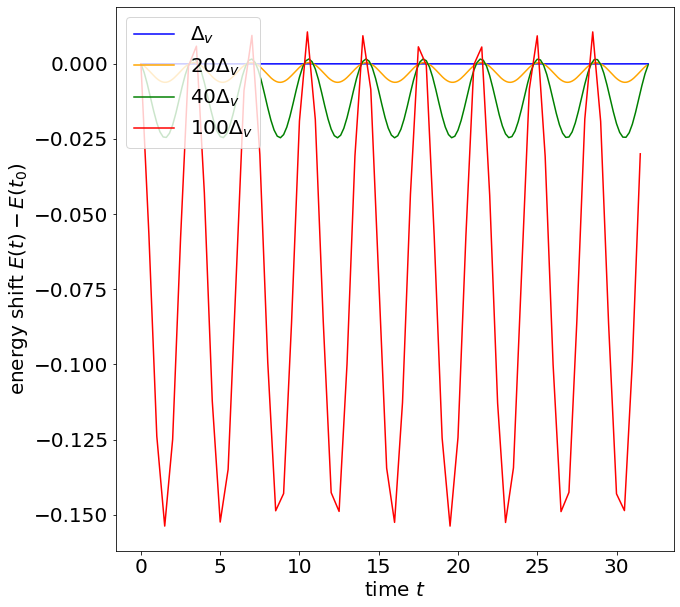

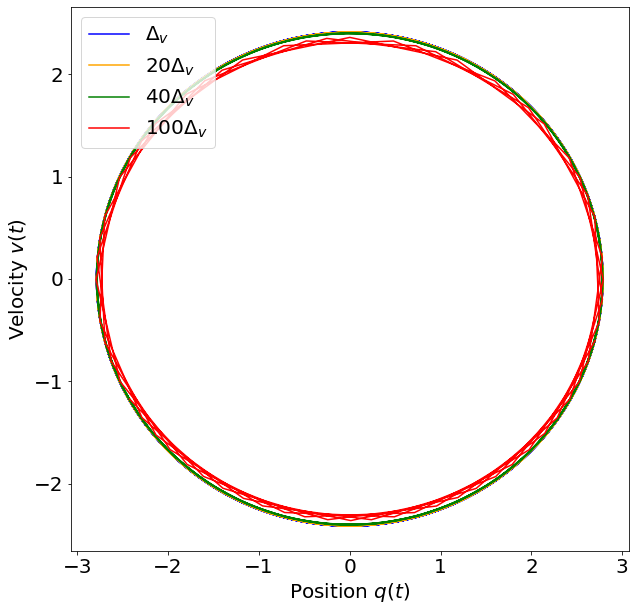

In [ ]:
# Final time
T_final = 32

# Initial conditions
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.70
v[0] = -0.6
verlet_SHO_1.set_state(x,v)
verlet_SHO_2.set_state(x,v)
verlet_SHO_3.set_state(x,v)
verlet_SHO_4.set_state(x,v)


# ==== Verlet integrator ====

t_1=0.0
t_verlet_SHO_1 = []
x_verlet_SHO_1 = []
v_verlet_SHO_1 = []
E_verlet_SHO_1 = []
t_2=0.0
t_verlet_SHO_2 = []
x_verlet_SHO_2 = []
v_verlet_SHO_2 = []
E_verlet_SHO_2 = []
t_3=0.0
t_verlet_SHO_3 = []
x_verlet_SHO_3 = []
v_verlet_SHO_3 = []
E_verlet_SHO_3 = []
t_4=0.0
t_verlet_SHO_4 = []
x_verlet_SHO_4 = []
v_verlet_SHO_4 = []
E_verlet_SHO_4 = []


while t_1<T_final:
    t_verlet_SHO_1.append(t_1)
    E_verlet_SHO_1.append(verlet_SHO_1.energy())
    x_verlet_SHO_1.append(verlet_SHO_1.x[0])
    v_verlet_SHO_1.append(verlet_SHO_1.v[0])
    verlet_SHO_1.integrate(1)
    t_1 += dt_verlet

while t_2<T_final:
    t_verlet_SHO_2.append(t_2)
    E_verlet_SHO_2.append(verlet_SHO_2.energy())
    x_verlet_SHO_2.append(verlet_SHO_2.x[0])
    v_verlet_SHO_2.append(verlet_SHO_2.v[0])
    verlet_SHO_2.integrate(1)
    t_2 += dt_2

while t_3<T_final:
    t_verlet_SHO_3.append(t_3)
    E_verlet_SHO_3.append(verlet_SHO_3.energy())
    x_verlet_SHO_3.append(verlet_SHO_3.x[0])
    v_verlet_SHO_3.append(verlet_SHO_3.v[0])
    verlet_SHO_3.integrate(1)
    t_3 += dt_3

while t_4<T_final:
    t_verlet_SHO_4.append(t_4)
    E_verlet_SHO_4.append(verlet_SHO_4.energy())
    x_verlet_SHO_4.append(verlet_SHO_4.x[0])
    v_verlet_SHO_4.append(verlet_SHO_4.v[0])
    verlet_SHO_4.integrate(1)
    t_4 += dt_4


x_verlet_SHO_1 = np.array(x_verlet_SHO_1)
x_verlet_SHO_2 = np.array(x_verlet_SHO_2)
x_verlet_SHO_3 = np.array(x_verlet_SHO_3)
x_verlet_SHO_4 = np.array(x_verlet_SHO_4)
v_verlet_SHO_1 = np.array(v_verlet_SHO_1)
v_verlet_SHO_2 = np.array(v_verlet_SHO_2)
v_verlet_SHO_3 = np.array(v_verlet_SHO_3)
v_verlet_SHO_4 = np.array(v_verlet_SHO_4)




# Plot position  as a function of time
plt.clf()
plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(t_verlet_SHO_1,x_verlet_SHO_1,label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,x_verlet_SHO_2,label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,x_verlet_SHO_3,label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,x_verlet_SHO_4,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position  $x_{NN}(t)$')
ax.set_title('Position ')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot position error as a function of time
plt.clf()
plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(t_verlet_SHO_1,x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,x_verlet_SHO_2-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,x_verlet_SHO_3-x_verlet_SHO_1[0::int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position Error $x_{NN}(t)-x_V(t)$')
ax.set_title('Position Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot velocity  as a function of time

plt.plot(t_verlet_SHO_1,v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,v_verlet_SHO_2-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,v_verlet_SHO_3-v_verlet_SHO_1[0::int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('Velocity Error $v_{NN}(t)-v_V(t)$')
ax.set_title('Velocity Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot L2 error as a function of time

plt.plot(t_verlet_SHO_1,((v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2+(x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2)**0.5,label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,((v_verlet_SHO_2-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_2/dt_verlet)])**2+(x_verlet_SHO_2-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_2/dt_verlet)])**2)**0.5,label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,((v_verlet_SHO_3-v_verlet_SHO_1[0::int(dt_3/dt_verlet)])**2+(x_verlet_SHO_3-x_verlet_SHO_1[0::int(dt_3/dt_verlet)])**2)**0.5,label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,((v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2+(x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2)**0.5,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('L2 Error')
ax.set_title('L2 Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()


plt.clf()
# Plot energy drift as a function of time
# (subtract energy at time t=0 to show energy drift)

plt.plot(t_verlet_SHO_1,E_verlet_SHO_1-E_verlet_SHO_1[0],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,E_verlet_SHO_2-E_verlet_SHO_2[0],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,E_verlet_SHO_3-E_verlet_SHO_3[0],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,E_verlet_SHO_4-E_verlet_SHO_4[0],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('energy shift $E(t)-E(t_0)$')
#ax.grid()
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

plt.show()

#subplots of position versus velocity for all 4

plt.rcParams['figure.figsize'] = [10, 10]

plt.clf()
plt.plot(x_verlet_SHO_1,v_verlet_SHO_1,label='$\Delta_v$',color='blue')
plt.plot(x_verlet_SHO_2,v_verlet_SHO_2,label='$20\Delta_v$',color='orange')
plt.plot(x_verlet_SHO_3,v_verlet_SHO_3,label='$40\Delta_v$',color='green')
plt.plot(x_verlet_SHO_4,v_verlet_SHO_4,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_ylabel('Velocity $v(t)$')
ax.set_xlabel('Position $q(t)$')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.show()

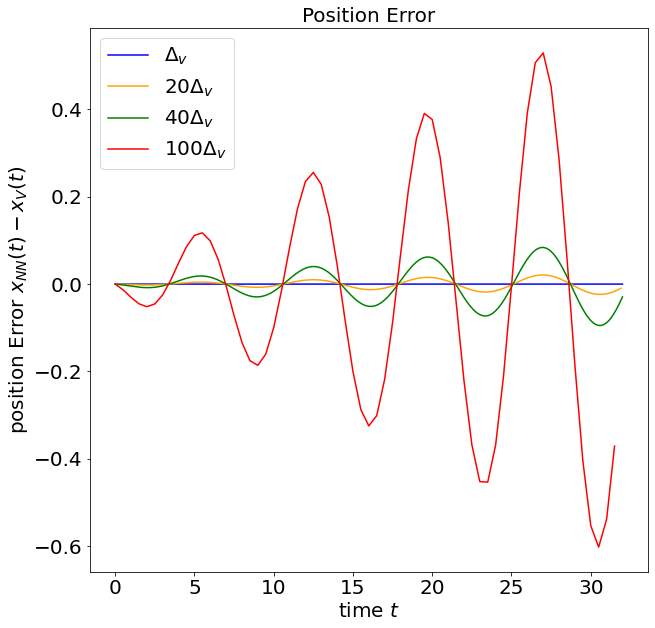

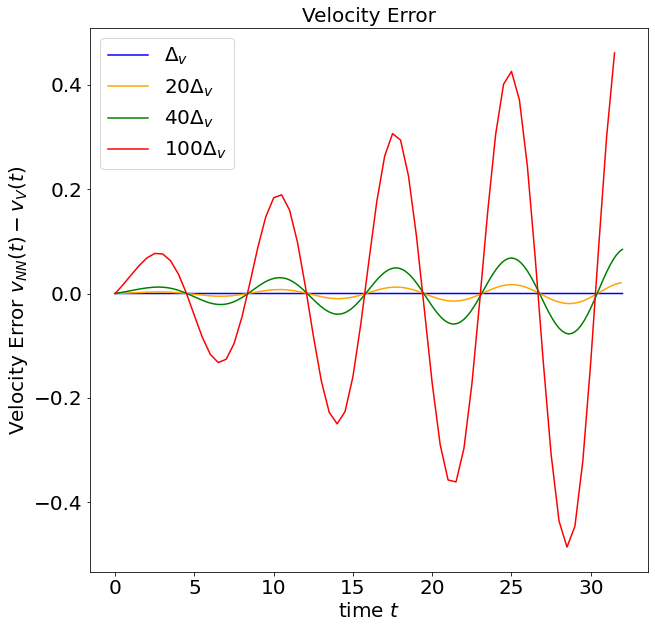

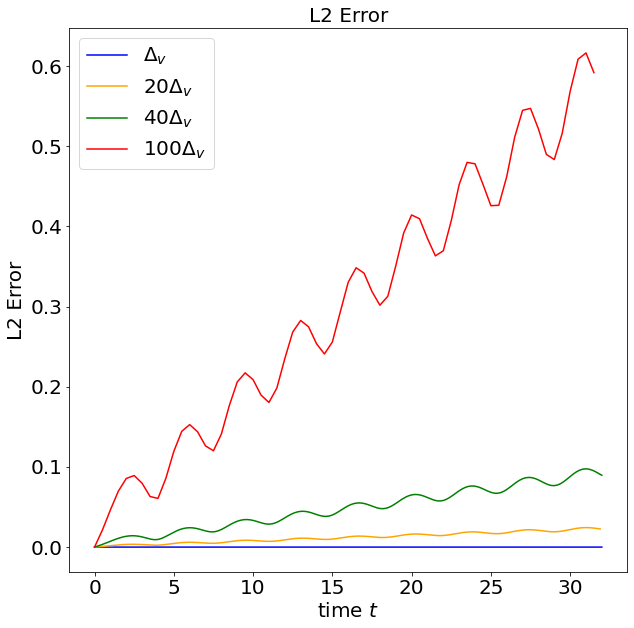

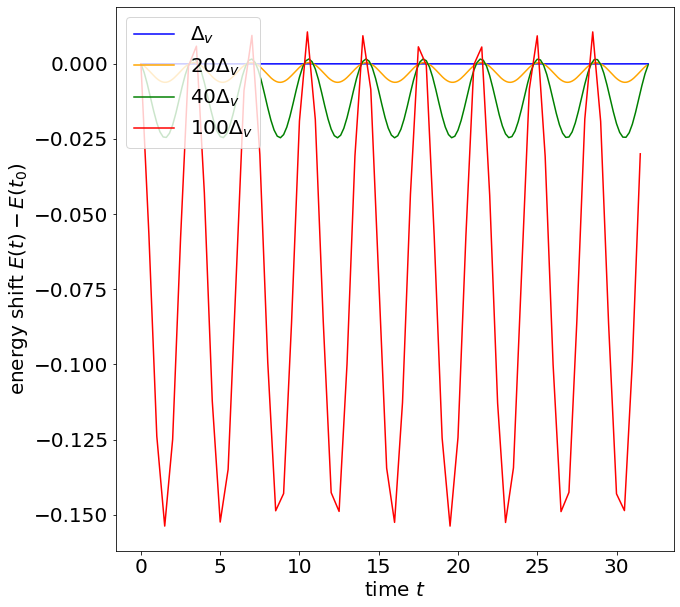

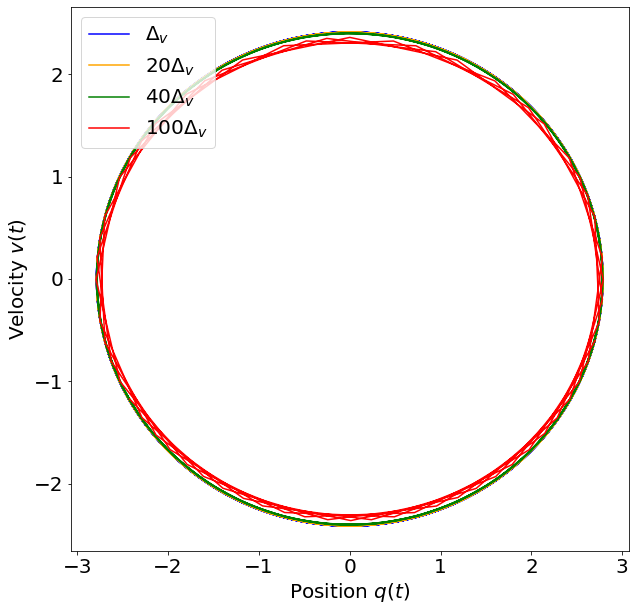

In [ ]:
# Final time
T_final = 32

# Initial conditions
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.70
v[0] = -0.6
verlet_SHO_1.set_state(x,v)
verlet_SHO_2.set_state(x,v)
verlet_SHO_3.set_state(x,v)
verlet_SHO_4.set_state(x,v)


# ==== Verlet integrator ====

t_1=0.0
t_verlet_SHO_1 = []
x_verlet_SHO_1 = []
v_verlet_SHO_1 = []
E_verlet_SHO_1 = []
t_2=0.0
t_verlet_SHO_2 = []
x_verlet_SHO_2 = []
v_verlet_SHO_2 = []
E_verlet_SHO_2 = []
t_3=0.0
t_verlet_SHO_3 = []
x_verlet_SHO_3 = []
v_verlet_SHO_3 = []
E_verlet_SHO_3 = []
t_4=0.0
t_verlet_SHO_4 = []
x_verlet_SHO_4 = []
v_verlet_SHO_4 = []
E_verlet_SHO_4 = []


while t_1<T_final:
    t_verlet_SHO_1.append(t_1)
    E_verlet_SHO_1.append(verlet_SHO_1.energy())
    x_verlet_SHO_1.append(verlet_SHO_1.x[0])
    v_verlet_SHO_1.append(verlet_SHO_1.v[0])
    verlet_SHO_1.integrate(1)
    t_1 += dt_verlet

while t_2<T_final:
    t_verlet_SHO_2.append(t_2)
    E_verlet_SHO_2.append(verlet_SHO_2.energy())
    x_verlet_SHO_2.append(verlet_SHO_2.x[0])
    v_verlet_SHO_2.append(verlet_SHO_2.v[0])
    verlet_SHO_2.integrate(1)
    t_2 += dt_2

while t_3<T_final:
    t_verlet_SHO_3.append(t_3)
    E_verlet_SHO_3.append(verlet_SHO_3.energy())
    x_verlet_SHO_3.append(verlet_SHO_3.x[0])
    v_verlet_SHO_3.append(verlet_SHO_3.v[0])
    verlet_SHO_3.integrate(1)
    t_3 += dt_3

while t_4<T_final:
    t_verlet_SHO_4.append(t_4)
    E_verlet_SHO_4.append(verlet_SHO_4.energy())
    x_verlet_SHO_4.append(verlet_SHO_4.x[0])
    v_verlet_SHO_4.append(verlet_SHO_4.v[0])
    verlet_SHO_4.integrate(1)
    t_4 += dt_4


x_verlet_SHO_1 = np.array(x_verlet_SHO_1)
x_verlet_SHO_2 = np.array(x_verlet_SHO_2)
x_verlet_SHO_3 = np.array(x_verlet_SHO_3)
x_verlet_SHO_4 = np.array(x_verlet_SHO_4)
v_verlet_SHO_1 = np.array(v_verlet_SHO_1)
v_verlet_SHO_2 = np.array(v_verlet_SHO_2)
v_verlet_SHO_3 = np.array(v_verlet_SHO_3)
v_verlet_SHO_4 = np.array(v_verlet_SHO_4)


# Plot position error as a function of time
plt.clf()
plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(t_verlet_SHO_1,x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,x_verlet_SHO_2-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,x_verlet_SHO_3-x_verlet_SHO_1[0::int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position Error $x_{NN}(t)-x_V(t)$')
ax.set_title('Position Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot velocity  as a function of time

plt.plot(t_verlet_SHO_1,v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,v_verlet_SHO_2-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,v_verlet_SHO_3-v_verlet_SHO_1[0::int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('Velocity Error $v_{NN}(t)-v_V(t)$')
ax.set_title('Velocity Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot L2 error as a function of time

plt.plot(t_verlet_SHO_1,((v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2+(x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2)**0.5,label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,((v_verlet_SHO_2-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_2/dt_verlet)])**2+(x_verlet_SHO_2-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_2/dt_verlet)])**2)**0.5,label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,((v_verlet_SHO_3-v_verlet_SHO_1[0::int(dt_3/dt_verlet)])**2+(x_verlet_SHO_3-x_verlet_SHO_1[0::int(dt_3/dt_verlet)])**2)**0.5,label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,((v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2+(x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2)**0.5,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('L2 Error')
ax.set_title('L2 Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()


plt.clf()
# Plot energy drift as a function of time
# (subtract energy at time t=0 to show energy drift)

plt.plot(t_verlet_SHO_1,E_verlet_SHO_1-E_verlet_SHO_1[0],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,E_verlet_SHO_2-E_verlet_SHO_2[0],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,E_verlet_SHO_3-E_verlet_SHO_3[0],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,E_verlet_SHO_4-E_verlet_SHO_4[0],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('energy shift $E(t)-E(t_0)$')
#ax.grid()
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

plt.show()

#subplots of position versus velocity for all 4

plt.rcParams['figure.figsize'] = [10, 10]

plt.clf()
plt.plot(x_verlet_SHO_1,v_verlet_SHO_1,label='$\Delta_v$',color='blue')
plt.plot(x_verlet_SHO_2,v_verlet_SHO_2,label='$20\Delta_v$',color='orange')
plt.plot(x_verlet_SHO_3,v_verlet_SHO_3,label='$40\Delta_v$',color='green')
plt.plot(x_verlet_SHO_4,v_verlet_SHO_4,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_ylabel('Velocity $v(t)$')
ax.set_xlabel('Position $q(t)$')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.show()

## Plot trajectories generated to $t=128$ by Verlet integrator


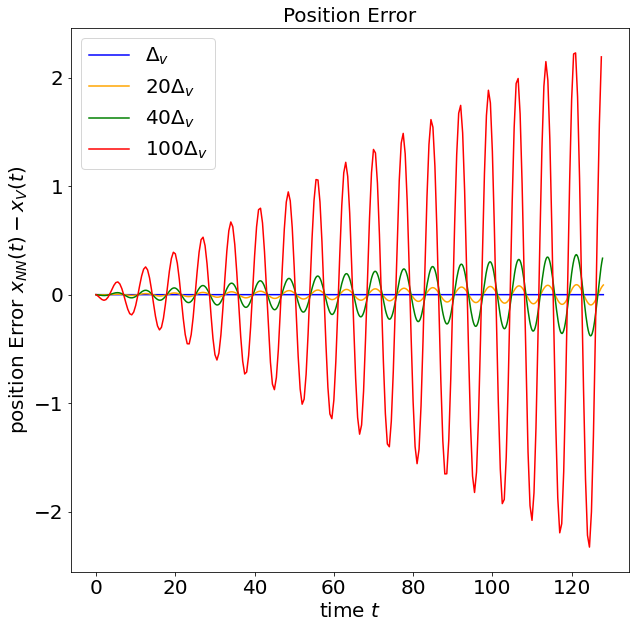

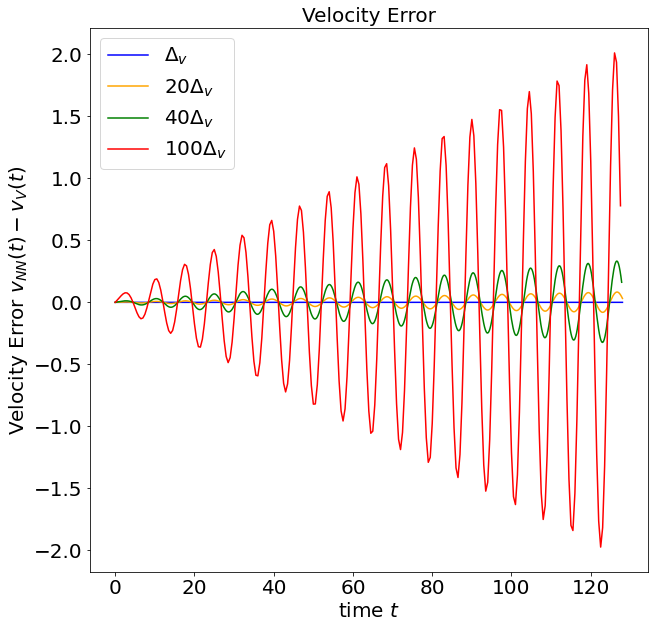

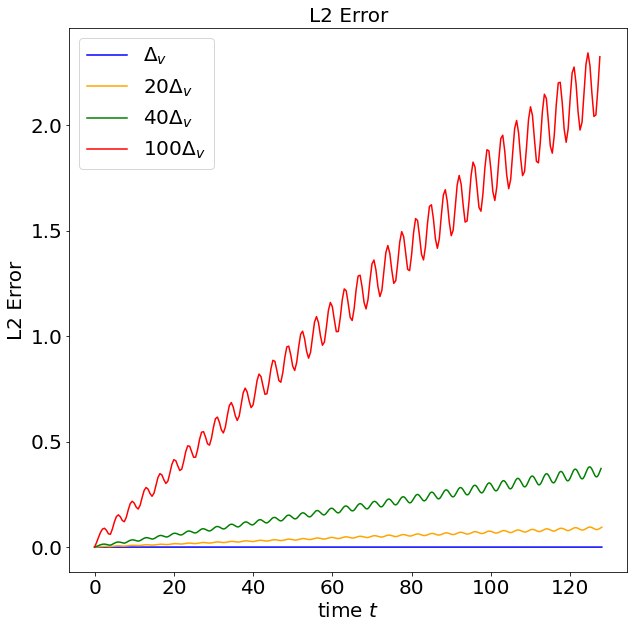

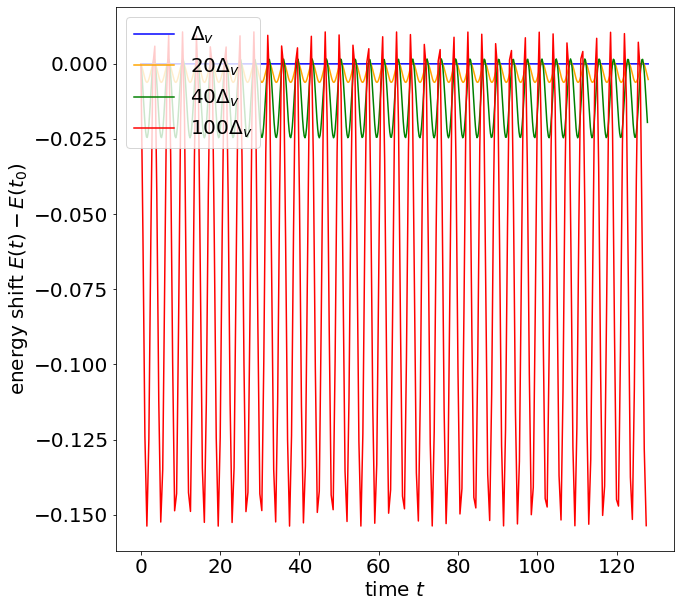

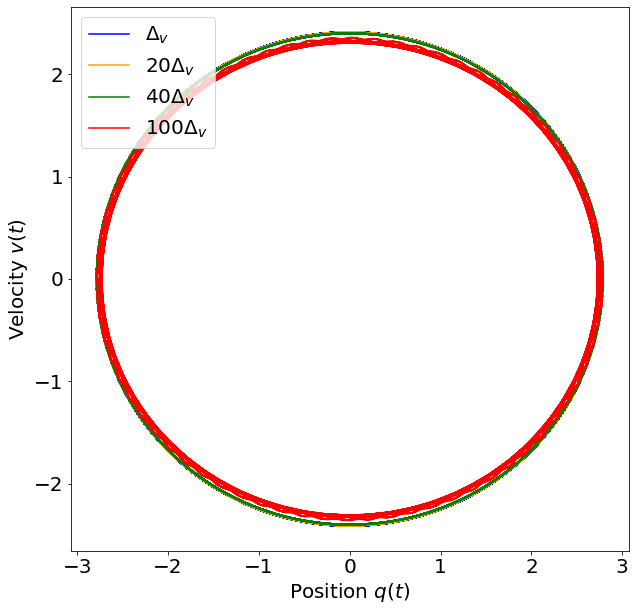

In [ ]:
# Final time
T_final = 128

# Initial conditions
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.70
v[0] = -0.6
verlet_SHO_1.set_state(x,v)
verlet_SHO_2.set_state(x,v)
verlet_SHO_3.set_state(x,v)
verlet_SHO_4.set_state(x,v)


# ==== Verlet integrator ====

t_1=0.0
t_verlet_SHO_1 = []
x_verlet_SHO_1 = []
v_verlet_SHO_1 = []
E_verlet_SHO_1 = []
t_2=0.0
t_verlet_SHO_2 = []
x_verlet_SHO_2 = []
v_verlet_SHO_2 = []
E_verlet_SHO_2 = []
t_3=0.0
t_verlet_SHO_3 = []
x_verlet_SHO_3 = []
v_verlet_SHO_3 = []
E_verlet_SHO_3 = []
t_4=0.0
t_verlet_SHO_4 = []
x_verlet_SHO_4 = []
v_verlet_SHO_4 = []
E_verlet_SHO_4 = []


while t_1<T_final:
    t_verlet_SHO_1.append(t_1)
    E_verlet_SHO_1.append(verlet_SHO_1.energy())
    x_verlet_SHO_1.append(verlet_SHO_1.x[0])
    v_verlet_SHO_1.append(verlet_SHO_1.v[0])
    verlet_SHO_1.integrate(1)
    t_1 += dt_verlet

while t_2<T_final:
    t_verlet_SHO_2.append(t_2)
    E_verlet_SHO_2.append(verlet_SHO_2.energy())
    x_verlet_SHO_2.append(verlet_SHO_2.x[0])
    v_verlet_SHO_2.append(verlet_SHO_2.v[0])
    verlet_SHO_2.integrate(1)
    t_2 += dt_2

while t_3<T_final:
    t_verlet_SHO_3.append(t_3)
    E_verlet_SHO_3.append(verlet_SHO_3.energy())
    x_verlet_SHO_3.append(verlet_SHO_3.x[0])
    v_verlet_SHO_3.append(verlet_SHO_3.v[0])
    verlet_SHO_3.integrate(1)
    t_3 += dt_3

while t_4<T_final:
    t_verlet_SHO_4.append(t_4)
    E_verlet_SHO_4.append(verlet_SHO_4.energy())
    x_verlet_SHO_4.append(verlet_SHO_4.x[0])
    v_verlet_SHO_4.append(verlet_SHO_4.v[0])
    verlet_SHO_4.integrate(1)
    t_4 += dt_4


x_verlet_SHO_1 = np.array(x_verlet_SHO_1)
x_verlet_SHO_2 = np.array(x_verlet_SHO_2)
x_verlet_SHO_3 = np.array(x_verlet_SHO_3)
x_verlet_SHO_4 = np.array(x_verlet_SHO_4)
v_verlet_SHO_1 = np.array(v_verlet_SHO_1)
v_verlet_SHO_2 = np.array(v_verlet_SHO_2)
v_verlet_SHO_3 = np.array(v_verlet_SHO_3)
v_verlet_SHO_4 = np.array(v_verlet_SHO_4)


# Plot position error as a function of time
plt.clf()
plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(t_verlet_SHO_1,x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,x_verlet_SHO_2-x_verlet_SHO_1[0::int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,x_verlet_SHO_3-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position Error $x_{NN}(t)-x_V(t)$')
ax.set_title('Position Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot velocity  as a function of time

plt.plot(t_verlet_SHO_1,v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,v_verlet_SHO_2-v_verlet_SHO_1[0::int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,v_verlet_SHO_3-v_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('Velocity Error $v_{NN}(t)-v_V(t)$')
ax.set_title('Velocity Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot L2 error as a function of time

plt.plot(t_verlet_SHO_1,((v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2+(x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2)**0.5,label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,((v_verlet_SHO_2-v_verlet_SHO_1[0::int(dt_2/dt_verlet)])**2+(x_verlet_SHO_2-x_verlet_SHO_1[0::int(dt_2/dt_verlet)])**2)**0.5,label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,((v_verlet_SHO_3-v_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_3/dt_verlet)])**2+(x_verlet_SHO_3-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_3/dt_verlet)])**2)**0.5,label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,((v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2+(x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2)**0.5,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('L2 Error')
ax.set_title('L2 Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()


plt.clf()
# Plot energy drift as a function of time
# (subtract energy at time t=0 to show energy drift)

plt.plot(t_verlet_SHO_1,E_verlet_SHO_1-E_verlet_SHO_1[0],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,E_verlet_SHO_2-E_verlet_SHO_2[0],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,E_verlet_SHO_3-E_verlet_SHO_3[0],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,E_verlet_SHO_4-E_verlet_SHO_4[0],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('energy shift $E(t)-E(t_0)$')
#ax.grid()
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

plt.show()

#subplots of position versus velocity for all 4

plt.rcParams['figure.figsize'] = [10, 10]

plt.clf()
plt.plot(x_verlet_SHO_1,v_verlet_SHO_1,label='$\Delta_v$',color='blue')
plt.plot(x_verlet_SHO_2,v_verlet_SHO_2,label='$20\Delta_v$',color='orange')
plt.plot(x_verlet_SHO_3,v_verlet_SHO_3,label='$40\Delta_v$',color='green')
plt.plot(x_verlet_SHO_4,v_verlet_SHO_4,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_ylabel('Velocity $v(t)$')
ax.set_xlabel('Position $q(t)$')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.show()

## Plot trajectories generated to $t=512$ by Verlet integrator


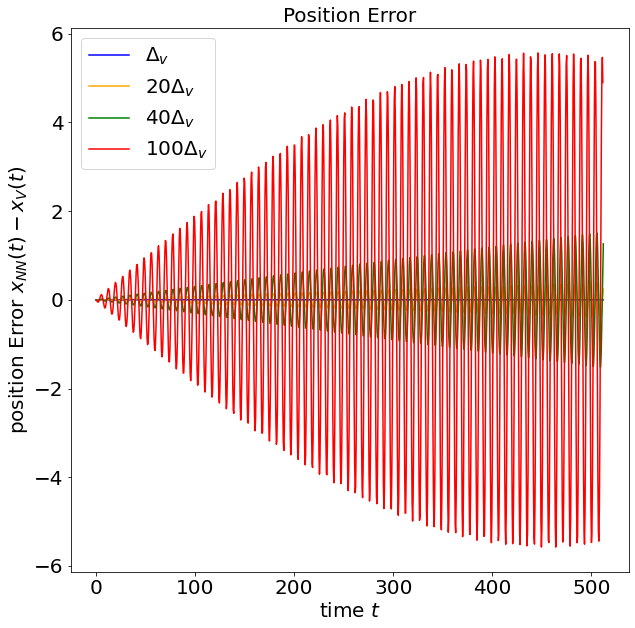

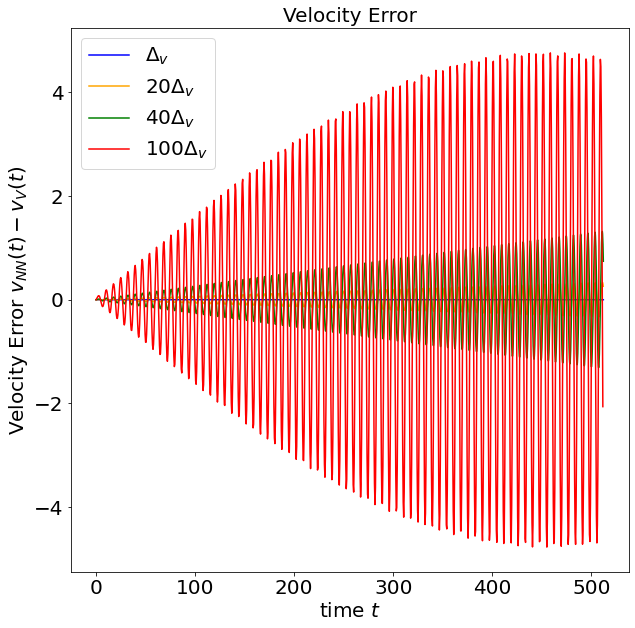

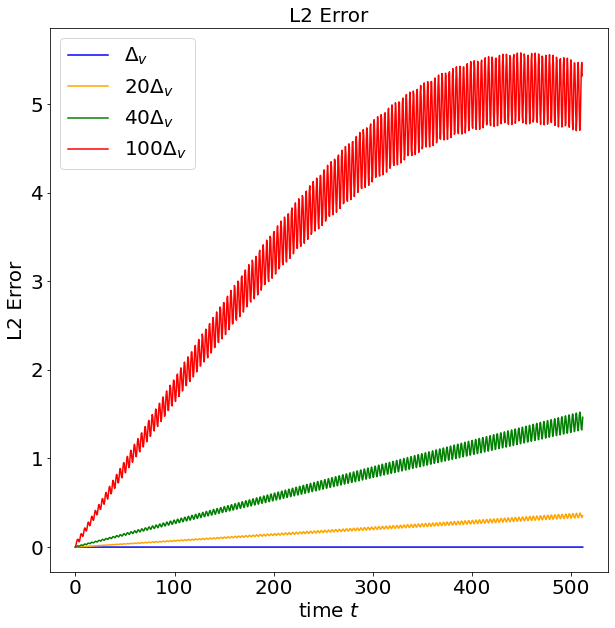

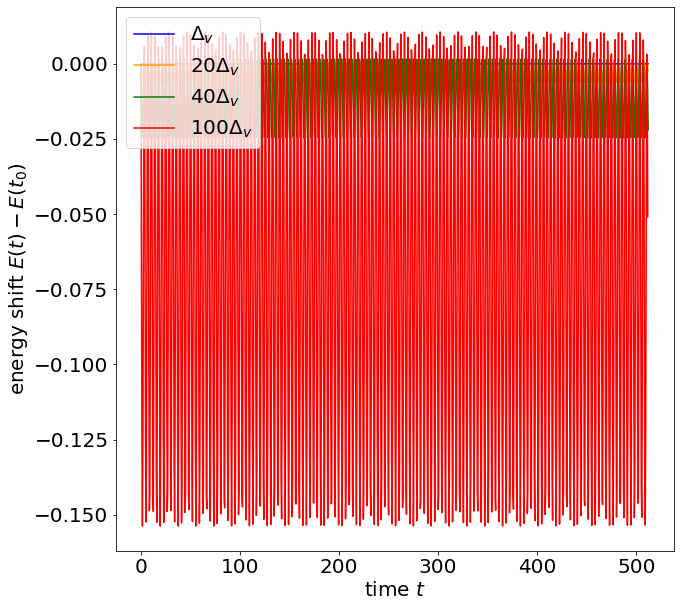

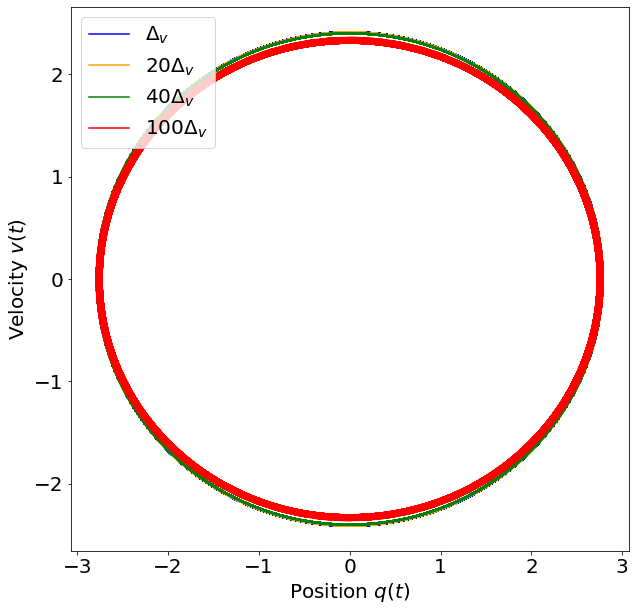

In [ ]:
# Final time
T_final = 512

# Initial conditions
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.70
v[0] = -0.6
verlet_SHO_1.set_state(x,v)
verlet_SHO_2.set_state(x,v)
verlet_SHO_3.set_state(x,v)
verlet_SHO_4.set_state(x,v)


# ==== Verlet integrator ====

t_1=0.0
t_verlet_SHO_1 = []
x_verlet_SHO_1 = []
v_verlet_SHO_1 = []
E_verlet_SHO_1 = []
t_2=0.0
t_verlet_SHO_2 = []
x_verlet_SHO_2 = []
v_verlet_SHO_2 = []
E_verlet_SHO_2 = []
t_3=0.0
t_verlet_SHO_3 = []
x_verlet_SHO_3 = []
v_verlet_SHO_3 = []
E_verlet_SHO_3 = []
t_4=0.0
t_verlet_SHO_4 = []
x_verlet_SHO_4 = []
v_verlet_SHO_4 = []
E_verlet_SHO_4 = []


while t_1<T_final:
    t_verlet_SHO_1.append(t_1)
    E_verlet_SHO_1.append(verlet_SHO_1.energy())
    x_verlet_SHO_1.append(verlet_SHO_1.x[0])
    v_verlet_SHO_1.append(verlet_SHO_1.v[0])
    verlet_SHO_1.integrate(1)
    t_1 += dt_verlet

while t_2<T_final:
    t_verlet_SHO_2.append(t_2)
    E_verlet_SHO_2.append(verlet_SHO_2.energy())
    x_verlet_SHO_2.append(verlet_SHO_2.x[0])
    v_verlet_SHO_2.append(verlet_SHO_2.v[0])
    verlet_SHO_2.integrate(1)
    t_2 += dt_2

while t_3<T_final:
    t_verlet_SHO_3.append(t_3)
    E_verlet_SHO_3.append(verlet_SHO_3.energy())
    x_verlet_SHO_3.append(verlet_SHO_3.x[0])
    v_verlet_SHO_3.append(verlet_SHO_3.v[0])
    verlet_SHO_3.integrate(1)
    t_3 += dt_3

while t_4<T_final:
    t_verlet_SHO_4.append(t_4)
    E_verlet_SHO_4.append(verlet_SHO_4.energy())
    x_verlet_SHO_4.append(verlet_SHO_4.x[0])
    v_verlet_SHO_4.append(verlet_SHO_4.v[0])
    verlet_SHO_4.integrate(1)
    t_4 += dt_4


x_verlet_SHO_1 = np.array(x_verlet_SHO_1)
x_verlet_SHO_2 = np.array(x_verlet_SHO_2)
x_verlet_SHO_3 = np.array(x_verlet_SHO_3)
x_verlet_SHO_4 = np.array(x_verlet_SHO_4)
v_verlet_SHO_1 = np.array(v_verlet_SHO_1)
v_verlet_SHO_2 = np.array(v_verlet_SHO_2)
v_verlet_SHO_3 = np.array(v_verlet_SHO_3)
v_verlet_SHO_4 = np.array(v_verlet_SHO_4)


# Plot position error as a function of time
plt.clf()
plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(t_verlet_SHO_1,x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,x_verlet_SHO_2-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,x_verlet_SHO_3-x_verlet_SHO_1[0::int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('position Error $x_{NN}(t)-x_V(t)$')
ax.set_title('Position Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot velocity  as a function of time

plt.plot(t_verlet_SHO_1,v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,v_verlet_SHO_2-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_2/dt_verlet)],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,v_verlet_SHO_3-v_verlet_SHO_1[0::int(dt_3/dt_verlet)],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('Velocity Error $v_{NN}(t)-v_V(t)$')
ax.set_title('Velocity Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()

# Plot L2 error as a function of time

plt.plot(t_verlet_SHO_1,((v_verlet_SHO_1-v_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2+(x_verlet_SHO_1-x_verlet_SHO_1[0::int(dt_verlet/dt_verlet)])**2)**0.5,label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,((v_verlet_SHO_2-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_2/dt_verlet)])**2+(x_verlet_SHO_2-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_2/dt_verlet)])**2)**0.5,label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,((v_verlet_SHO_3-v_verlet_SHO_1[0::int(dt_3/dt_verlet)])**2+(x_verlet_SHO_3-x_verlet_SHO_1[0::int(dt_3/dt_verlet)])**2)**0.5,label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,((v_verlet_SHO_4-v_verlet_SHO_1[0:np.size(v_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2+(x_verlet_SHO_4-x_verlet_SHO_1[0:np.size(x_verlet_SHO_1)-1:int(dt_4/dt_verlet)])**2)**0.5,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('L2 Error')
ax.set_title('L2 Error')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
#plt.grid()
plt.show()


plt.clf()
# Plot energy drift as a function of time
# (subtract energy at time t=0 to show energy drift)

plt.plot(t_verlet_SHO_1,E_verlet_SHO_1-E_verlet_SHO_1[0],label='$\Delta_v$',color='blue')
plt.plot(t_verlet_SHO_2,E_verlet_SHO_2-E_verlet_SHO_2[0],label='$20\Delta_v$',color='orange')
plt.plot(t_verlet_SHO_3,E_verlet_SHO_3-E_verlet_SHO_3[0],label='$40\Delta_v$',color='green')
plt.plot(t_verlet_SHO_4,E_verlet_SHO_4-E_verlet_SHO_4[0],label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_xlabel('time $t$')
ax.set_ylabel('energy shift $E(t)-E(t_0)$')
#ax.grid()
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

plt.show()

#subplots of position versus velocity for all 4

plt.rcParams['figure.figsize'] = [10, 10]

plt.clf()
plt.plot(x_verlet_SHO_1,v_verlet_SHO_1,label='$\Delta_v$',color='blue')
plt.plot(x_verlet_SHO_2,v_verlet_SHO_2,label='$20\Delta_v$',color='orange')
plt.plot(x_verlet_SHO_3,v_verlet_SHO_3,label='$40\Delta_v$',color='green')
plt.plot(x_verlet_SHO_4,v_verlet_SHO_4,label='$100\Delta_v$',color='red')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_ylabel('Velocity $v(t)$')
ax.set_xlabel('Position $q(t)$')
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.show()